# Capstone Project - "Group - C"

# Mentor - Ms Vidhya K

# Group Members :-

  # Aditya Mohan

  #  Aditya Prakash

  # Ashish Kumar

  # Suraj Prakash

  # Vishnu Saju

Introduction:
This dataset contains data collected on patients with diabetes from 130 hospitals over a period of 10 years. Different treatments and outcomes have been measured in the data.

The Objective for analysis :
Determine which treatments are more effective at treating diabetes.

Source:
The data are submitted on behalf of the Center for Clinical and Translational Research, Virginia Commonwealth University, a recipient of NIH CTSA grant UL1 TR00058 and a recipient of the CERNER data. John Clore (jclore '@' vcu.edu), Krzysztof J. Cios (kcios '@' vcu.edu), Jon DeShazo (jpdeshazo '@' vcu.edu), and Beata Strack (strackb '@' vcu.edu). This data is a de-identified abstract of the Health Facts database (Cerner Corporation, Kansas City, MO).
Citation: Beata Strack, Jonathan P. DeShazo, Chris Gennings, Juan L. Olmo, Sebastian Ventura, Krzysztof J. Cios, and John N. Clore, “Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records,” BioMed Research International, vol. 2014, Article ID 781670, 11 pages, 2014.


### Problem Statement

### The hospitals are evaluating efficiency of Insulin based treatment for patients. Recommend if solo insulin treatments work well towards the above stated objective for a new patient, given his medical history and characteristics, should we recommend solo insulin or a conjunction of other drugs/ treatment?


### Importing The Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
from sklearn.metrics import accuracy_score, classification_report

In [3]:
# Import the csv file in pandas
diabetic=pd.read_csv('C://Users//Acer//Downloads//Capstone//Project//diabetic_data.csv')

In [4]:
diabetic.columns

Index(['encounter_id', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [5]:
diabetic.head(5) # Shows top 20 rows of data

,encounter_id,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,None,None,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,NO
1,149190,None,None,No,No,No,No,No,No,No,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,None,None,No,No,No,No,No,No,Steady,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,None,None,No,No,No,No,No,No,No,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,None,None,No,No,No,No,No,No,Steady,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
diabetic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 29 columns):
encounter_id                101766 non-null int64
max_glu_serum               101766 non-null object
A1Cresult                   101766 non-null object
metformin                   101766 non-null object
repaglinide                 101766 non-null object
nateglinide                 101766 non-null object
chlorpropamide              101766 non-null object
glimepiride                 101766 non-null object
acetohexamide               101766 non-null object
glipizide                   101766 non-null object
glyburide                   101766 non-null object
tolbutamide                 101766 non-null object
pioglitazone                101766 non-null object
rosiglitazone               101766 non-null object
acarbose                    101766 non-null object
miglitol                    101766 non-null object
troglitazone                101766 non-null object
tolazamide             

In [5]:
for i in diabetic.columns:
    if np.dtype(diabetic[i]).name=='object':
        print('\n','Column Name:',i,'\t','\n',diabetic[i].value_counts())


 Column Name: max_glu_serum 	 
 None    96420
Norm     2597
>200     1485
>300     1264
Name: max_glu_serum, dtype: int64

 Column Name: A1Cresult 	 
 None    84748
>8       8216
Norm     4990
>7       3812
Name: A1Cresult, dtype: int64

 Column Name: metformin 	 
 No        81778
Steady    18346
Up         1067
Down        575
Name: metformin, dtype: int64

 Column Name: repaglinide 	 
 No        100227
Steady      1384
Up           110
Down          45
Name: repaglinide, dtype: int64

 Column Name: nateglinide 	 
 No        101063
Steady       668
Up            24
Down          11
Name: nateglinide, dtype: int64

 Column Name: chlorpropamide 	 
 No        101680
Steady        79
Up             6
Down           1
Name: chlorpropamide, dtype: int64

 Column Name: glimepiride 	 
 No        96575
Steady     4670
Up          327
Down        194
Name: glimepiride, dtype: int64

 Column Name: acetohexamide 	 
 No        101765
Steady         1
Name: acetohexamide, dtype: int64

 Column Nam

# EDA

## Calculating Chi-Square for all the categorical columns

In [7]:
a=pd.crosstab(diabetic.insulin, diabetic.metformin)
a

metformin,Down,No,Steady,Up
insulin,,,,
Down,68,10323,1698,129
No,244,37407,9310,422
Steady,208,24666,5604,371
Up,55,9382,1734,145


In [8]:
stat, p_value, df, exp_feq = stats.chi2_contingency(a)
print('Stats: ',stat)
print('P value: ' ,p_value)
print('Degre OfFreedom: ', df)

Stats:  312.3723724849295
P value:  6.1813682521589355e-62
Degre OfFreedom:  9


In [9]:
cols=[ 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']

In [10]:
independent=0
dependent=0
for i in cols:
    for j in cols:
        stat, p_value, df, exp_feq = stats.chi2_contingency(pd.crosstab(diabetic[i],diabetic[j]))
        if i!=j:
            if p_value>0.01:
                independent+=1
                print(i,j," ",p_value," \n they are independent and accept null hypothesis \n")
            else:
                dependent+=1
                print(i,j," ",p_value," \n they are dependent and accept alternate hypo. \n")
                
                
        else:
            print(i,j," ","same columns \n")
   
 # now here p value is approximately zero so which means p_value < 0.01 that means reject Ho and accept H1.
 # And that means both the data elements are dependent on each other.

max_glu_serum max_glu_serum   same columns 

max_glu_serum A1Cresult   1.1975891788867973e-119  
 they are dependent and accept alternate hypo. 

max_glu_serum metformin   1.3406501523910972e-20  
 they are dependent and accept alternate hypo. 

max_glu_serum repaglinide   1.1253265834772236e-05  
 they are dependent and accept alternate hypo. 

max_glu_serum nateglinide   5.0285517869943005e-05  
 they are dependent and accept alternate hypo. 

max_glu_serum chlorpropamide   0.976308744028909  
 they are independent and accept null hypothesis 

max_glu_serum glimepiride   1.4685768540991555e-21  
 they are dependent and accept alternate hypo. 

max_glu_serum acetohexamide   0.9965848836579569  
 they are independent and accept null hypothesis 

max_glu_serum glipizide   1.5376885884768095e-07  
 they are dependent and accept alternate hypo. 

max_glu_serum glyburide   0.022849057366150772  
 they are independent and accept null hypothesis 

max_glu_serum tolbutamide   0.00025770969205

repaglinide nateglinide   0.9725801599478939  
 they are independent and accept null hypothesis 

repaglinide chlorpropamide   0.998266254824247  
 they are independent and accept null hypothesis 

repaglinide glimepiride   0.2107675844986866  
 they are independent and accept null hypothesis 

repaglinide acetohexamide   0.9994962601563239  
 they are independent and accept null hypothesis 

repaglinide glipizide   2.4147250335938493e-05  
 they are dependent and accept alternate hypo. 

repaglinide glyburide   5.3941835247253825e-12  
 they are dependent and accept alternate hypo. 

repaglinide tolbutamide   0.9497216068952038  
 they are independent and accept null hypothesis 

repaglinide pioglitazone   3.597729761490395e-13  
 they are dependent and accept alternate hypo. 

repaglinide rosiglitazone   0.023337733565224398  
 they are independent and accept null hypothesis 

repaglinide acarbose   2.4493709255347605e-08  
 they are dependent and accept alternate hypo. 

repaglinide

glimepiride glimepiride   same columns 

glimepiride acetohexamide   0.9967385385756831  
 they are independent and accept null hypothesis 

glimepiride glipizide   1.0934471124521172e-113  
 they are dependent and accept alternate hypo. 

glimepiride glyburide   6.00293741356382e-104  
 they are dependent and accept alternate hypo. 

glimepiride tolbutamide   0.74425168420271  
 they are independent and accept null hypothesis 

glimepiride pioglitazone   9.354034993988937e-41  
 they are dependent and accept alternate hypo. 

glimepiride rosiglitazone   2.0005676626395968e-38  
 they are dependent and accept alternate hypo. 

glimepiride acarbose   1.6562658734341785e-05  
 they are dependent and accept alternate hypo. 

glimepiride miglitol   4.74580430116919e-09  
 they are dependent and accept alternate hypo. 

glimepiride troglitazone   0.12887390987334696  
 they are independent and accept null hypothesis 

glimepiride tolazamide   0.9105559115957473  
 they are independent and a

glyburide pioglitazone   1.389244464871803e-14  
 they are dependent and accept alternate hypo. 

glyburide rosiglitazone   2.6101186054490896e-37  
 they are dependent and accept alternate hypo. 

glyburide acarbose   0.004604111297473046  
 they are dependent and accept alternate hypo. 

glyburide miglitol   0.8263467523282069  
 they are independent and accept null hypothesis 

glyburide troglitazone   0.9502348670819265  
 they are independent and accept null hypothesis 

glyburide tolazamide   0.6013197270873334  
 they are independent and accept null hypothesis 

glyburide examide   1.0  
 they are independent and accept null hypothesis 

glyburide citoglipton   1.0  
 they are independent and accept null hypothesis 

glyburide insulin   1.2036327284581575e-188  
 they are dependent and accept alternate hypo. 

glyburide glyburide-metformin   0.11301024434674344  
 they are independent and accept null hypothesis 

glyburide glipizide-metformin   0.975005500393229  
 they are inde

rosiglitazone tolazamide   0.956633141126928  
 they are independent and accept null hypothesis 

rosiglitazone examide   1.0  
 they are independent and accept null hypothesis 

rosiglitazone citoglipton   1.0  
 they are independent and accept null hypothesis 

rosiglitazone insulin   4.597004121422057e-09  
 they are dependent and accept alternate hypo. 

rosiglitazone glyburide-metformin   0.3270847989363542  
 they are independent and accept null hypothesis 

rosiglitazone glipizide-metformin   0.8332749709219012  
 they are independent and accept null hypothesis 

rosiglitazone glimepiride-pioglitazone   0.9955071977463279  
 they are independent and accept null hypothesis 

rosiglitazone metformin-rosiglitazone   0.9875426507106599  
 they are independent and accept null hypothesis 

rosiglitazone metformin-pioglitazone   0.9955071977463279  
 they are independent and accept null hypothesis 

rosiglitazone change   0.0  
 they are dependent and accept alternate hypo. 

rosiglita

troglitazone metformin-pioglitazone   0.0  
 they are dependent and accept alternate hypo. 

troglitazone change   0.19695935085810576  
 they are independent and accept null hypothesis 

troglitazone diabetesMed   0.7944370635431297  
 they are independent and accept null hypothesis 

troglitazone readmitted   0.4878015804003256  
 they are independent and accept null hypothesis 

tolazamide max_glu_serum   0.9895483837306127  
 they are independent and accept null hypothesis 

tolazamide A1Cresult   0.00016056294626391526  
 they are dependent and accept alternate hypo. 

tolazamide metformin   0.006094858573421846  
 they are dependent and accept alternate hypo. 

tolazamide repaglinide   0.9964158185162058  
 they are independent and accept null hypothesis 

tolazamide nateglinide   0.9996237350685452  
 they are independent and accept null hypothesis 

tolazamide chlorpropamide   0.9999992606181275  
 they are independent and accept null hypothesis 

tolazamide glimepiride   0.910

insulin pioglitazone   6.943005790535962e-05  
 they are dependent and accept alternate hypo. 

insulin rosiglitazone   4.597004121422057e-09  
 they are dependent and accept alternate hypo. 

insulin acarbose   3.990660127863605e-07  
 they are dependent and accept alternate hypo. 

insulin miglitol   0.11618849548090629  
 they are independent and accept null hypothesis 

insulin troglitazone   0.6612125191205911  
 they are independent and accept null hypothesis 

insulin tolazamide   0.0050712381894953825  
 they are dependent and accept alternate hypo. 

insulin examide   1.0  
 they are independent and accept null hypothesis 

insulin citoglipton   1.0  
 they are independent and accept null hypothesis 

insulin insulin   same columns 

insulin glyburide-metformin   0.03548071915072025  
 they are independent and accept null hypothesis 

insulin glipizide-metformin   0.8663909701065575  
 they are independent and accept null hypothesis 

insulin glimepiride-pioglitazone   0.51273

glimepiride-pioglitazone glyburide   0.9897368700760824  
 they are independent and accept null hypothesis 

glimepiride-pioglitazone tolbutamide   2.19979679992558e-242  
 they are dependent and accept alternate hypo. 

glimepiride-pioglitazone pioglitazone   0.9943831124566404  
 they are independent and accept null hypothesis 

glimepiride-pioglitazone rosiglitazone   0.9955071977463279  
 they are independent and accept null hypothesis 

glimepiride-pioglitazone acarbose   0.9999555546483733  
 they are independent and accept null hypothesis 

glimepiride-pioglitazone miglitol   0.9999980800444457  
 they are independent and accept null hypothesis 

glimepiride-pioglitazone troglitazone   0.0  
 they are dependent and accept alternate hypo. 

glimepiride-pioglitazone tolazamide   0.999808326966019  
 they are independent and accept null hypothesis 

glimepiride-pioglitazone examide   1.0  
 they are independent and accept null hypothesis 

glimepiride-pioglitazone citoglipton   1.0

change glimepiride   0.0  
 they are dependent and accept alternate hypo. 

change acetohexamide   0.9391662642977323  
 they are independent and accept null hypothesis 

change glipizide   0.0  
 they are dependent and accept alternate hypo. 

change glyburide   0.0  
 they are dependent and accept alternate hypo. 

change tolbutamide   0.958335936068177  
 they are independent and accept null hypothesis 

change pioglitazone   0.0  
 they are dependent and accept alternate hypo. 

change rosiglitazone   0.0  
 they are dependent and accept alternate hypo. 

change acarbose   5.784571000548559e-47  
 they are dependent and accept alternate hypo. 

change miglitol   4.1098979371692304e-05  
 they are dependent and accept alternate hypo. 

change troglitazone   0.19695935085810576  
 they are independent and accept null hypothesis 

change tolazamide   0.5000215050688073  
 they are independent and accept null hypothesis 

change examide   1.0  
 they are independent and accept null hyp

In [11]:
print('Indepentent Pair Count: ', independent)
print('Depentent Pair Count: ', dependent)

Indepentent Pair Count:  484
Depentent Pair Count:  272


## For Chi - Square test at 99% interval if (p-value  > alpha) accept Ho otherwise Reject H1 


In [12]:
# Converting the medicines values into numerical

data=diabetic.iloc[:,3:26].replace(['No', 'Steady', 'Down', 'Up'], [0,1,1,1])
data.set_index(diabetic.encounter_id, inplace=True) 

In [13]:
data.head()

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,...,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
encounter_id,,,,,,,,,,,,,,,,,,,,,
2278392,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
149190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
64410,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
500364,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
16680,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [14]:
data.sum(axis=1).value_counts() # Taking the sum row-wise

1    47314
0    23403
2    21873
3     7778
4     1335
5       58
6        5
dtype: int64

# Feature Engineering

In [15]:
# Finding the data where insuline in given to the patients
insuline_1=print("Insuline Based Treatment \n" ,data[data.insulin==1].sum(axis=1).value_counts())
insuline_1

Insuline Based Treatment 
 1    30965
2    15437
3     6625
4     1295
5       57
6        4
dtype: int64


In [16]:
# Finding the data where insuline in not given to the patients
insuline_0=print('Insulin Is Not Used For Treating Diabeties \n',data[data.insulin==0].sum(axis=1).value_counts())
insuline_0

Insulin Is Not Used For Treating Diabeties 
 0    23403
1    16349
2     6436
3     1153
4       40
6        1
5        1
dtype: int64


In [17]:
# Changing the numerical values into name
# As 1 indicate that only insuline is given to the patients
# And 2,3,4,5,6 indicate that insuline plus other drugs are given.

insuline_1=data[data.insulin==1].sum(axis=1).replace([1,2,3,4,5,6],['Insuline', 'Insu+Other', 'Insu+Other', 'Insu+Other','Insu+Other', 'Insu+Other'])
insuline_1.head()

encounter_id
149190      Insuline
500364      Insuline
16680     Insu+Other
35754       Insuline
55842     Insu+Other
dtype: object

In [18]:
# As 0 indicate that no medicine is given to the patients
# And 2,3,4,5,6 indicate that other drugs are given.

insuline_0=data[data.insulin==0].sum(axis=1).replace([0,1,2,3,4,5,6],['NoMed','Other','Other','Other','Other','Other','Other'])
insuline_0.head()

encounter_id
2278392    NoMed
64410      Other
63768      Other
84222      Other
182796     NoMed
dtype: object

In [19]:
# Combining both the cases
treatments=pd.concat([insuline_0, insuline_1])

In [20]:
treatments.head()

encounter_id
2278392    NoMed
64410      Other
63768      Other
84222      Other
182796     NoMed
dtype: object

In [21]:
# Making the dataframe

treatments = pd.DataFrame({'treatments':treatments})

In [22]:
treatments.head()

,treatments
encounter_id,
2278392,NoMed
64410,Other
63768,Other
84222,Other
182796,NoMed


In [23]:
# Joining both the datasets

diabetic=diabetic.join(treatments,how='inner',on='encounter_id')
diabetic.head()

,encounter_id,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,treatments
0,2278392,None,None,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,NO,NoMed
1,149190,None,None,No,No,No,No,No,No,No,...,Up,No,No,No,No,No,Ch,Yes,>30,Insuline
2,64410,None,None,No,No,No,No,No,No,Steady,...,No,No,No,No,No,No,No,Yes,NO,Other
3,500364,None,None,No,No,No,No,No,No,No,...,Up,No,No,No,No,No,Ch,Yes,NO,Insuline
4,16680,None,None,No,No,No,No,No,No,Steady,...,Steady,No,No,No,No,No,Ch,Yes,NO,Insu+Other


In [24]:
# Droping all the drugs as we have derived the new feature column as treatment

diabetic.drop( ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
                'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'insulin',
                'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin',
                'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone'],
                 axis=1, inplace=True)


In [25]:
diabetic.head()

,encounter_id,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,treatments
0,2278392,None,None,No,No,NO,NoMed
1,149190,None,None,Ch,Yes,>30,Insuline
2,64410,None,None,No,Yes,NO,Other
3,500364,None,None,Ch,Yes,NO,Insuline
4,16680,None,None,Ch,Yes,NO,Insu+Other


In [26]:
# Changing the readmittted column and combining '>30', '<30' as Yes
diabetic.readmitted.replace(['>30', '<30', 'NO'], ['Yes', 'Yes', 'No'],inplace=True)

In [27]:
diabetic.head()

,encounter_id,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,treatments
0,2278392,None,None,No,No,No,NoMed
1,149190,None,None,Ch,Yes,Yes,Insuline
2,64410,None,None,No,Yes,No,Other
3,500364,None,None,Ch,Yes,No,Insuline
4,16680,None,None,Ch,Yes,No,Insu+Other


Before achieving objective arranging data accordingly for simple and easy analysis.

1. From the given data diabetesMed attribute is "YES" when a diabetic medication is given to treatment and similary "NO" means that no diabetic medication is given to a patient:-

   So, according to the given objective considering records who are taking diabetic medication.
   

2. According to objective need to suggest effective medication,the word effective means the patient should have some effect after taking particular treatment.

   Made an assumption that if patient taking a diabetic medication and not readmitting into the hospital is effective treatment for that patient and considering records with reamitted as "Yes".

In [28]:
observation=diabetic[(diabetic['diabetesMed']=='Yes') & (diabetic['readmitted']=='Yes')  & (diabetic['treatments'].isin(['Insuline', 'Insu+Other']))]
observation.treatments.value_counts()

Insuline      15230
Insu+Other    10967
Name: treatments, dtype: int64

In [29]:
diabetic.treatments.value_counts()

Insuline      30965
Other         23980
Insu+Other    23418
NoMed         23403
Name: treatments, dtype: int64

In [30]:
print('Readmission Rate of Patients given Solo Insulin ',int(abs(1-(15230/30965))*100),'%')

Readmission Rate of Patients given Solo Insulin  50 %


In [31]:
print('Readmission Rate of patients given Insulin combined with other Drugs',int(abs(1-(10967/23418))*100),'%')

Readmission Rate of patients given Insulin combined with other Drugs 53 %


### An intresting observation from the above snippet is despite of giving Solo Insulin to more patients but the patients readmission rate is low for patients taking Solo Insulin Treatment. Important inference from the data is that solo Insulin is more effective for patients.

## Taking the required part of the data.

In [32]:
# Our objective is to find effective treatment among solo insulin or insulin combined with other drugs.
# As we have four treatments given to a patient but according to objective only require two treatments.

observation=diabetic[(diabetic['diabetesMed']=='Yes') & (diabetic['treatments'].isin(['Insuline', 'Insu+Other']))]
observation.treatments.value_counts()

Insuline      30965
Insu+Other    23418
Name: treatments, dtype: int64

In [33]:
observation.treatments.replace(['Insuline','Insu+Other'], [0,1] ,inplace=True)

C:\Users\Acer\Anaconda3\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [34]:
observation.head()

,encounter_id,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,treatments
1,149190,None,None,Ch,Yes,Yes,0
3,500364,None,None,Ch,Yes,No,0
4,16680,None,None,Ch,Yes,No,1
5,35754,None,None,No,Yes,Yes,0
6,55842,None,None,Ch,Yes,No,1


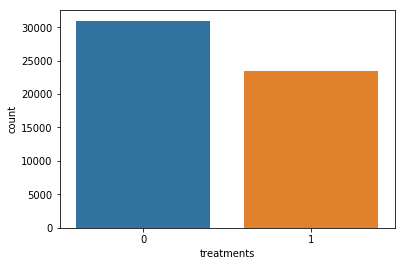

In [35]:
sns.countplot(observation.treatments)

In [36]:
observation.columns

Index(['encounter_id', 'max_glu_serum', 'A1Cresult', 'change', 'diabetesMed',
       'readmitted', 'treatments'],
      dtype='object')

In [37]:
# Making the dummies
observation=pd.get_dummies(observation)
observation.drop('encounter_id', axis=1, inplace=True)

In [38]:
observation.treatments.value_counts()

0    30965
1    23418
Name: treatments, dtype: int64

In [39]:
observation.columns

Index(['treatments', 'max_glu_serum_>200', 'max_glu_serum_>300',
       'max_glu_serum_None', 'max_glu_serum_Norm', 'A1Cresult_>7',
       'A1Cresult_>8', 'A1Cresult_None', 'A1Cresult_Norm', 'change_Ch',
       'change_No', 'diabetesMed_Yes', 'readmitted_No', 'readmitted_Yes'],
      dtype='object')

In [40]:
x=observation.drop('treatments', axis=1)
x.shape

(54383, 13)

In [41]:
y=observation.treatments
y.shape

(54383,)

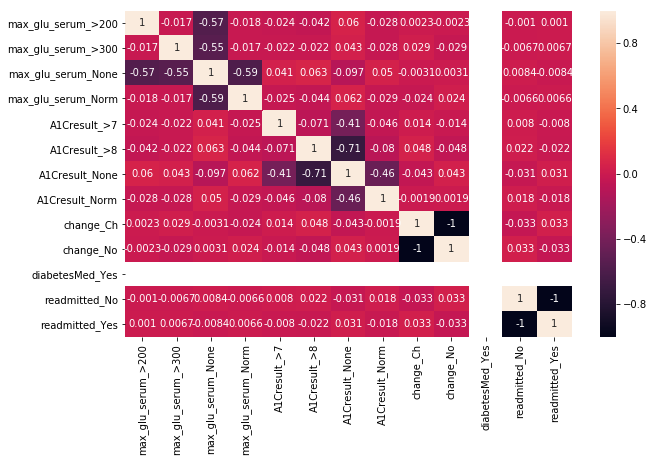

In [42]:
# Checking The Multicorrinerity

plt.figure(figsize=(10,6))
sns.heatmap(x.corr(), annot=True)

# Applying PCA

In [43]:
from sklearn.decomposition import PCA
pca=PCA(n_components=7)

In [44]:
pca_train = pd.DataFrame(pca.fit_transform(x))
pca_train.head()

,0,1,2,3,4,5,6
0,-0.801664,-0.269061,-0.232114,0.005275,-0.080235,-0.007281,0.002074
1,0.590187,-0.512208,-0.292178,0.001257,-0.078910,-0.005394,0.003179
2,0.590187,-0.512208,-0.292178,0.001257,-0.078910,-0.005394,0.003179
3,-0.554417,1.118697,-0.119517,-0.008075,-0.078451,-0.002718,-0.005430
4,0.590187,-0.512208,-0.292178,0.001257,-0.078910,-0.005394,0.003179


In [45]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [46]:
# Required for inverse Scaling
savekaro=sc.fit_transform(pd.DataFrame(observation.treatments))

C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [47]:
# Inverse Scaling the data
pca_train=sc.inverse_transform(pca_train)

In [48]:
np.cumsum(pca.explained_variance_ratio_)

array([0.36930147, 0.67651881, 0.84519336, 0.89647259, 0.94333403,
       0.97490708, 0.98798373])

In [49]:
# Taking n_components as 7
sum(np.cumsum(pca.explained_variance_ratio_)<=.99)

7

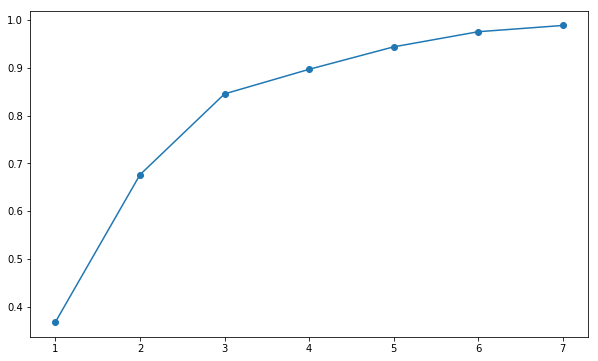

In [50]:
plt.figure(figsize=[10,6])
plt.plot(range(1,8), np.cumsum(pca.explained_variance_ratio_), '-o')

# Splitting it into train and test

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train, x_test, y_train, y_test = train_test_split(pca_train,y, test_size=0.30, random_state=123)

# Applying Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report

In [54]:
lr=LogisticRegression()

In [55]:
model=lr.fit(x_train, y_train)

C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [56]:
prediction=lr.predict(x_test)

In [57]:
accuracy_score(y_test,prediction)

0.7311063438553478

In [58]:
acc_lr = accuracy_score(y_test,prediction)

In [59]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.97      0.54      0.69      9242
           1       0.62      0.98      0.76      7073

   micro avg       0.73      0.73      0.73     16315
   macro avg       0.80      0.76      0.73     16315
weighted avg       0.82      0.73      0.72     16315



# Applying Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
forest=RandomForestClassifier(max_depth=5, n_estimators=10)

In [62]:
predforest=forest.fit(x_train, y_train).predict(x_test)

In [63]:
accuracy_score(y_test, predforest)

0.731719276739197

In [64]:
acc_rf = accuracy_score(y_test, predforest)

In [65]:
print(classification_report(y_test,predforest))

              precision    recall  f1-score   support

           0       0.97      0.55      0.70      9242
           1       0.62      0.97      0.76      7073

   micro avg       0.73      0.73      0.73     16315
   macro avg       0.79      0.76      0.73     16315
weighted avg       0.82      0.73      0.72     16315



# Grid Search

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
grid=GridSearchCV(estimator=forest , param_grid={'max_depth':[5,7], 'n_estimators':[10,50,100]})

In [68]:
grid.fit(x_train,y_train)

C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [5, 7], 'n_estimators': [10, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [69]:
grid.best_params_

{'max_depth': 5, 'n_estimators': 10}

# Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()

In [71]:
pred_tree=tree.fit(x_train, y_train).predict(x_test)

In [72]:
accuracy_score(y_test, pred_tree)

0.730983757278578

In [73]:
acc_dt = accuracy_score(y_test, pred_tree)

In [74]:
print(classification_report(y_test, pred_tree))

              precision    recall  f1-score   support

           0       0.97      0.54      0.69      9242
           1       0.62      0.98      0.76      7073

   micro avg       0.73      0.73      0.73     16315
   macro avg       0.80      0.76      0.73     16315
weighted avg       0.82      0.73      0.72     16315



# Ensemble - Bagging

In [75]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(n_estimators=20)

In [76]:
pred_bagg=bg.fit(x_train, y_train).predict(x_test)

In [77]:
accuracy_score(y_test, pred_bagg)

0.7305547042598836

In [78]:
acc_bagg =accuracy_score(y_test, pred_bagg)

In [79]:
print(classification_report(y_test, pred_bagg))

              precision    recall  f1-score   support

           0       0.98      0.53      0.69      9242
           1       0.62      0.99      0.76      7073

   micro avg       0.73      0.73      0.73     16315
   macro avg       0.80      0.76      0.73     16315
weighted avg       0.82      0.73      0.72     16315



# Ensemble - Xgboost

In [80]:
from xgboost import XGBClassifier

In [81]:
XGBR = XGBClassifier()

In [82]:
pred_xgbr=XGBR.fit(np.array(x_train), y_train).predict(np.array(x_test))

In [83]:
accuracy_score(y_test, pred_xgbr)

0.7307385841250383

In [84]:
acc_XGB = accuracy_score(y_test, pred_xgbr)

In [85]:
print(classification_report(y_test, pred_xgbr))

              precision    recall  f1-score   support

           0       0.98      0.54      0.69      9242
           1       0.62      0.99      0.76      7073

   micro avg       0.73      0.73      0.73     16315
   macro avg       0.80      0.76      0.73     16315
weighted avg       0.82      0.73      0.72     16315



# Ada - Boost

In [86]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()

In [87]:
pred=ad.fit(x_train, y_train).predict(x_test)

In [88]:
accuracy_score(y_test, pred)

0.7309224639901931

In [89]:
acc_ADABoost= accuracy_score(y_test, pred)

In [90]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.54      0.69      9242
           1       0.62      0.98      0.76      7073

   micro avg       0.73      0.73      0.73     16315
   macro avg       0.80      0.76      0.73     16315
weighted avg       0.82      0.73      0.72     16315



# Naive Bayes Models

## Gaussian NB

In [91]:
from sklearn.naive_bayes import GaussianNB

In [92]:
gb=GaussianNB()

In [93]:
naivepred=gb.fit(x_train, y_train).predict(x_test)

In [94]:
accuracy_score(y_test, naivepred)

0.7298804780876494

In [95]:
acc_nb = accuracy_score(y_test, naivepred)

In [96]:
print(classification_report(y_test, naivepred))

              precision    recall  f1-score   support

           0       0.95      0.55      0.70      9242
           1       0.62      0.96      0.76      7073

   micro avg       0.73      0.73      0.73     16315
   macro avg       0.79      0.76      0.73     16315
weighted avg       0.81      0.73      0.72     16315



## Bernoulli NB

In [97]:
from sklearn.naive_bayes import BernoulliNB

In [98]:
nai=BernoulliNB()

In [99]:
berpred=nai.fit(x_train, y_train).predict(x_test)

In [100]:
accuracy_score(y_test, berpred)

0.5664725712534477

In [101]:
acc_bnb = accuracy_score(y_test, berpred)

In [102]:
print(classification_report(y_test, berpred))

              precision    recall  f1-score   support

           0       0.57      1.00      0.72      9242
           1       0.00      0.00      0.00      7073

   micro avg       0.57      0.57      0.57     16315
   macro avg       0.28      0.50      0.36     16315
weighted avg       0.32      0.57      0.41     16315



C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Multinomial NB

In [103]:
from sklearn.naive_bayes import MultinomialNB

In [104]:
mn=MultinomialNB()

In [105]:
mnpred=mn.fit(x_train, y_train).predict(x_test)

In [106]:
accuracy_score(y_test, mnpred)

0.5734600061293288

In [107]:
acc_mnb = accuracy_score(y_test, mnpred)

In [108]:
print(classification_report(y_test, mnpred))

              precision    recall  f1-score   support

           0       0.57      0.99      0.72      9242
           1       0.73      0.03      0.05      7073

   micro avg       0.57      0.57      0.57     16315
   macro avg       0.65      0.51      0.39     16315
weighted avg       0.64      0.57      0.43     16315



# Voting Classifier

In [109]:
from sklearn.ensemble import VotingClassifier

In [110]:
vc = VotingClassifier(estimators=[('gb', gb),('nai', nai), ('mn', mn), ('tree', tree),
                                  ('forest', forest), ('lr', lr), ('bg', bg), ('ad', ad), ('XGBR', XGBR)])

In [111]:
vote=vc.fit(x_train, y_train).predict(x_test)

C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [112]:
accuracy_score(y_test, vote)

0.7311063438553478

In [113]:
acc_vc = accuracy_score(y_test, vote)

In [114]:
print(classification_report(y_test, vote))

              precision    recall  f1-score   support

           0       0.97      0.54      0.69      9242
           1       0.62      0.98      0.76      7073

   micro avg       0.73      0.73      0.73     16315
   macro avg       0.80      0.76      0.73     16315
weighted avg       0.82      0.73      0.72     16315



# Conclusive Report of the Models Applied.

In [115]:
accuracy_report = pd.DataFrame({'Model':['Logistic Regression','Random Forest (after Grid Search)', 'Decision tree','Bagging Classifier','XG-Boost','Ada-Boost','Gaussian NB','Bernoulli NB','Multinomial NB','Voting Classifier(Ensemble)'],
                                'Accuracy Score':[acc_lr,acc_rf,acc_dt,acc_bagg,acc_XGB,acc_ADABoost,acc_nb,acc_bnb,acc_mnb,acc_vc]}) 

In [116]:
accuracy_report

,Model,Accuracy Score
0,Logistic Regression,0.731106
1,Random Forest (after Grid Search),0.731719
2,Decision tree,0.730984
3,Bagging Classifier,0.730555
4,XG-Boost,0.730739
5,Ada-Boost,0.730922
6,Gaussian NB,0.729880
7,Bernoulli NB,0.566473
8,Multinomial NB,0.573460
9,Voting Classifier(Ensemble),0.731106
